(517, 14) (517,)
loss = 278.245932
accuracy = 0.500967
loss = 266.928267
accuracy = 0.499033
loss = 255.743697
accuracy = 0.499033
loss = 244.798975
accuracy = 0.500967
loss = 234.111507
accuracy = 0.502901
loss = 223.888368
accuracy = 0.493230
loss = 213.982739
accuracy = 0.491296
loss = 204.341863
accuracy = 0.500967
loss = 194.947195
accuracy = 0.500967
loss = 185.854933
accuracy = 0.497099
loss = 177.076840
accuracy = 0.508704
loss = 168.428926
accuracy = 0.518375
loss = 160.136144
accuracy = 0.522244
loss = 152.355237
accuracy = 0.529981
loss = 144.765094
accuracy = 0.549323
loss = 137.557039
accuracy = 0.555126
loss = 130.630661
accuracy = 0.578337
loss = 124.146125
accuracy = 0.597679
loss = 118.110204
accuracy = 0.628627
loss = 112.570054
accuracy = 0.649903
loss = 107.551419
accuracy = 0.667311
loss = 103.025436
accuracy = 0.680851
loss = 98.798252
accuracy = 0.698259
loss = 94.782001
accuracy = 0.711799
loss = 91.122485
accuracy = 0.723404
loss = 87.953750
accuracy = 0.727273

accuracy = 0.854932
loss = 53.596091
accuracy = 0.854932
loss = 53.556557
accuracy = 0.854932
loss = 53.524477
accuracy = 0.854932
loss = 53.480695
accuracy = 0.854932
loss = 53.447784
accuracy = 0.854932
loss = 53.409706
accuracy = 0.854932
loss = 53.371747
accuracy = 0.854932
loss = 53.335467
accuracy = 0.854932
loss = 53.297067
accuracy = 0.854932
loss = 53.264868
accuracy = 0.854932
loss = 53.220779
accuracy = 0.854932
loss = 53.187502
accuracy = 0.854932
loss = 53.152488
accuracy = 0.854932
loss = 53.117345
accuracy = 0.854932
loss = 53.078118
accuracy = 0.854932
loss = 53.039148
accuracy = 0.854932
loss = 53.013698
accuracy = 0.854932
loss = 52.969819
accuracy = 0.854932
loss = 52.941601
accuracy = 0.854932
loss = 52.898304
accuracy = 0.854932
loss = 52.871635
accuracy = 0.854932
loss = 52.835173
accuracy = 0.854932
loss = 52.804455
accuracy = 0.854932
loss = 52.767774
accuracy = 0.854932
loss = 52.737109
accuracy = 0.854932
loss = 52.688908
accuracy = 0.854932
loss = 52.657996
a

loss = 47.200793
accuracy = 0.854932
loss = 47.189757
accuracy = 0.854932
loss = 47.172710
accuracy = 0.854932
loss = 47.134935
accuracy = 0.854932
loss = 47.123244
accuracy = 0.854932
loss = 47.102380
accuracy = 0.854932
loss = 47.086248
accuracy = 0.854932
loss = 47.048647
accuracy = 0.854932
loss = 47.035881
accuracy = 0.854932
loss = 47.019209
accuracy = 0.856867
loss = 46.985052
accuracy = 0.854932
loss = 46.976453
accuracy = 0.856867
loss = 159.597040
accuracy = 0.450867
loss = 156.825526
accuracy = 0.450867
loss = 154.051901
accuracy = 0.450867
loss = 151.276221
accuracy = 0.450867
loss = 148.498540
accuracy = 0.456647
loss = 145.718916
accuracy = 0.450867
loss = 142.937850
accuracy = 0.450867
loss = 140.198947
accuracy = 0.445087
loss = 137.458269
accuracy = 0.445087
loss = 134.728772
accuracy = 0.445087
loss = 132.057833
accuracy = 0.445087
loss = 129.399243
accuracy = 0.445087
loss = 126.771437
accuracy = 0.445087
loss = 124.178101
accuracy = 0.456647
loss = 121.665201
accura

accuracy = 0.780347
loss = 24.918512
accuracy = 0.780347
loss = 24.886780
accuracy = 0.780347
loss = 24.853743
accuracy = 0.774566
loss = 24.822484
accuracy = 0.780347
loss = 24.789356
accuracy = 0.774566
loss = 24.758092
accuracy = 0.774566
loss = 24.725758
accuracy = 0.774566
loss = 24.694411
accuracy = 0.780347
loss = 24.664139
accuracy = 0.780347
loss = 24.639902
accuracy = 0.780347
loss = 24.616975
accuracy = 0.780347
loss = 24.601219
accuracy = 0.780347
loss = 24.579558
accuracy = 0.780347
loss = 24.565123
accuracy = 0.780347
loss = 24.549153
accuracy = 0.780347
loss = 24.533195
accuracy = 0.780347
loss = 24.511399
accuracy = 0.780347
loss = 24.496511
accuracy = 0.780347
loss = 24.480379
accuracy = 0.780347
loss = 24.459650
accuracy = 0.780347
loss = 24.443365
accuracy = 0.780347
loss = 24.428968
accuracy = 0.780347
loss = 24.406122
accuracy = 0.780347
loss = 24.391435
accuracy = 0.780347
loss = 24.368633
accuracy = 0.780347
loss = 24.353650
accuracy = 0.780347
loss = 24.336975
a

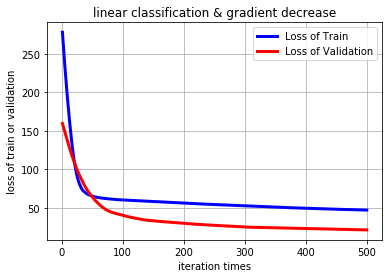

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split

def loadDataSet():
	# 读取数据
	X,y=load_svmlight_file("australian_scale.txt")
	#将稀疏矩阵转化为完整特征矩阵
	X = X.todense()
	# 将数据集切分为训练集和验证集 
	X_train, X_validation, y_train, y_validation = train_test_split(X, y, random_state=0)
	print(X_train.shape,y_train.shape)
	return X_train, X_validation, y_train, y_validation

def gradDescent(alpha,maxCycles,X_data,y_data):
	num = y_data.shape[0]    #样本数量
	# 线性模型参数正态分布初始化
	w = np.random.normal(size=(X_data.shape[1]))
	b = np.random.normal(size=1)
	losss = []
	tv = 0

	#迭代次maxCycles次
	for n in range(maxCycles):
		grad_w = np.ones(X_data.shape[1])*(np.linalg.norm(w,ord=2))
		grad_b = np.zeros(1)
		loss = 0
		error = 0
		C = 1/np.power(2,2)
		for i in range(num):
			y = np.dot( X_data[i][0].getA()[0], w ) + b
			if y_data[i] * y < 1:
				loss += C * max(0,1 - y_data[i] * y) 
				grad_w += - C * y_data[i] * X_data[i][0].getA()[0] 
				grad_b += - C * y_data[i] 
			if y > tv :
				y = 1
			else: y = -1
			if not y == y_data[i]:
				error += 1
		#更新模型参数
		w -= alpha * grad_w
		b -= alpha * grad_b
		losss.append(loss)
		print("loss = %f" % loss)
		print("accuracy = %f" % (1-error/num))
	return losss

def plotLossPerTime(n,losss_train,losss_validation):
	plt.xlabel('iteration times')
	plt.ylabel('loss of train or validation')
	plt.title('linear classification & gradient decrease')
	n_cycles = range(1,n+1)
	plt.plot(n_cycles, losss_train, label = "Loss of Train", color='blue', linewidth=3)
	plt.plot(n_cycles, losss_validation, label = "Loss of Validation", color='red', linewidth=3)
	plt.legend(loc=0)
	plt.grid()
	plt.show()

# main
X_train, X_validation, y_train, y_validation = loadDataSet()
alpha = 0.001
maxCycles = 500
losss_train = gradDescent(alpha,maxCycles,X_train,y_train)
losss_validation = gradDescent(alpha,maxCycles,X_validation,y_validation)
plotLossPerTime(maxCycles,losss_train,losss_validation)